# Using PowerTransformer for improving your model metrics

## Regression Example


Model Performance Comparison:
Metric               Raw Data        Scaled Data     Transformed Data
---------------------------------------------------------------------------
MSE                  0.5559          0.5559          0.5161         
R² Score             0.5758          0.5758          0.6061         

Feature Skewness Comparison:
Feature              Original        Transformed    
--------------------------------------------------
MedInc               1.6341          -0.0023        
HouseAge             0.0635          -0.1130        
AveRooms             18.6071         -0.1667        
AveBedrms            23.1707         -1.4805        
Population           5.2761          0.1106         
AveOccup             88.0527         -0.1118        
Latitude             0.4615          0.1518         
Longitude            -0.2884         0.0000         


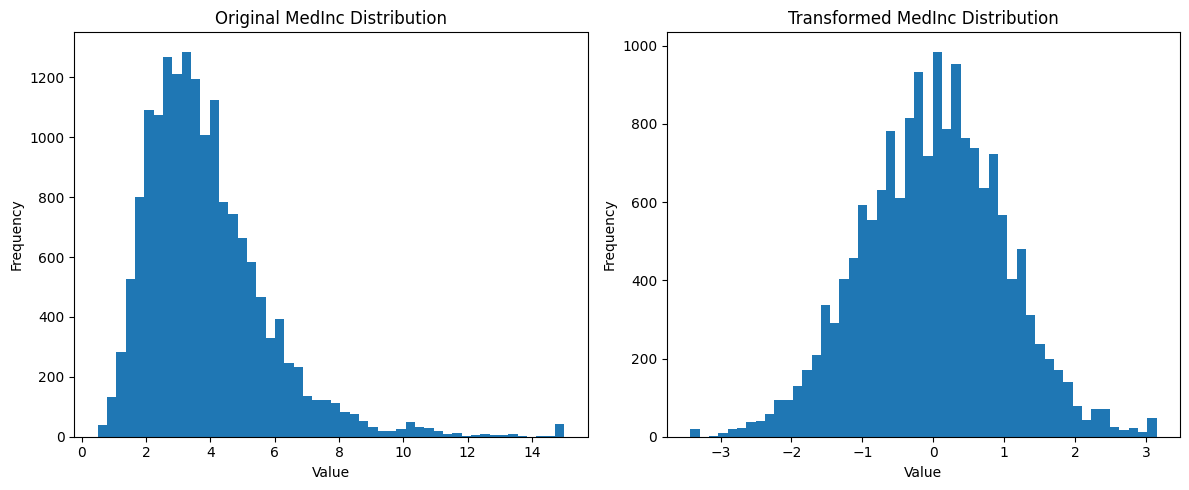

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize transformers and models
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
standard_scaler = StandardScaler()
model_raw = LinearRegression()
model_transformed = LinearRegression()
model_scaled = LinearRegression()

# Fit and evaluate model on raw data
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
mse_raw = mean_squared_error(y_test, y_pred_raw)
r2_raw = r2_score(y_test, y_pred_raw)

# Transform features using PowerTransformer
X_train_transformed = power_transformer.fit_transform(X_train)
X_test_transformed = power_transformer.transform(X_test)

# Fit and evaluate model on transformed data
model_transformed.fit(X_train_transformed, y_train)
y_pred_transformed = model_transformed.predict(X_test_transformed)
mse_transformed = mean_squared_error(y_test, y_pred_transformed)
r2_transformed = r2_score(y_test, y_pred_transformed)

# Scale features using StandardScaler
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

# Fit and evaluate model on scaled data
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Calculate skewness for original and transformed features
original_skew = X_train.skew()
transformed_skew = pd.DataFrame(
    X_train_transformed, 
    columns=X_train.columns
).skew()

# Print results
print("\nModel Performance Comparison:")
print(f"{'Metric':<20} {'Raw Data':<15} {'Scaled Data':<15} {'Transformed Data':<15}")
print("-" * 75)
print(f"{'MSE':<20} {mse_raw:<15.4f} {mse_scaled:<15.4f} {mse_transformed:<15.4f}")
print(f"{'R² Score':<20} {r2_raw:<15.4f} {r2_scaled:<15.4f} {r2_transformed:<15.4f}")

print("\nFeature Skewness Comparison:")
print(f"{'Feature':<20} {'Original':<15} {'Transformed':<15}")
print("-" * 50)
for feature in X_train.columns:
    print(f"{feature:<20} {original_skew[feature]:<15.4f} {transformed_skew[feature]:<15.4f}")

# Visualize distribution of a particularly skewed feature (MedInc)
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.hist(X_train['MedInc'], bins=50)
plt.title('Original MedInc Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(X_train_transformed[:, 0], bins=50)
plt.title('Transformed MedInc Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Classification Example

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st


Classification Report - Raw Data:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Classification Report - Scaled Data:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Classification Report - Transformed Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg

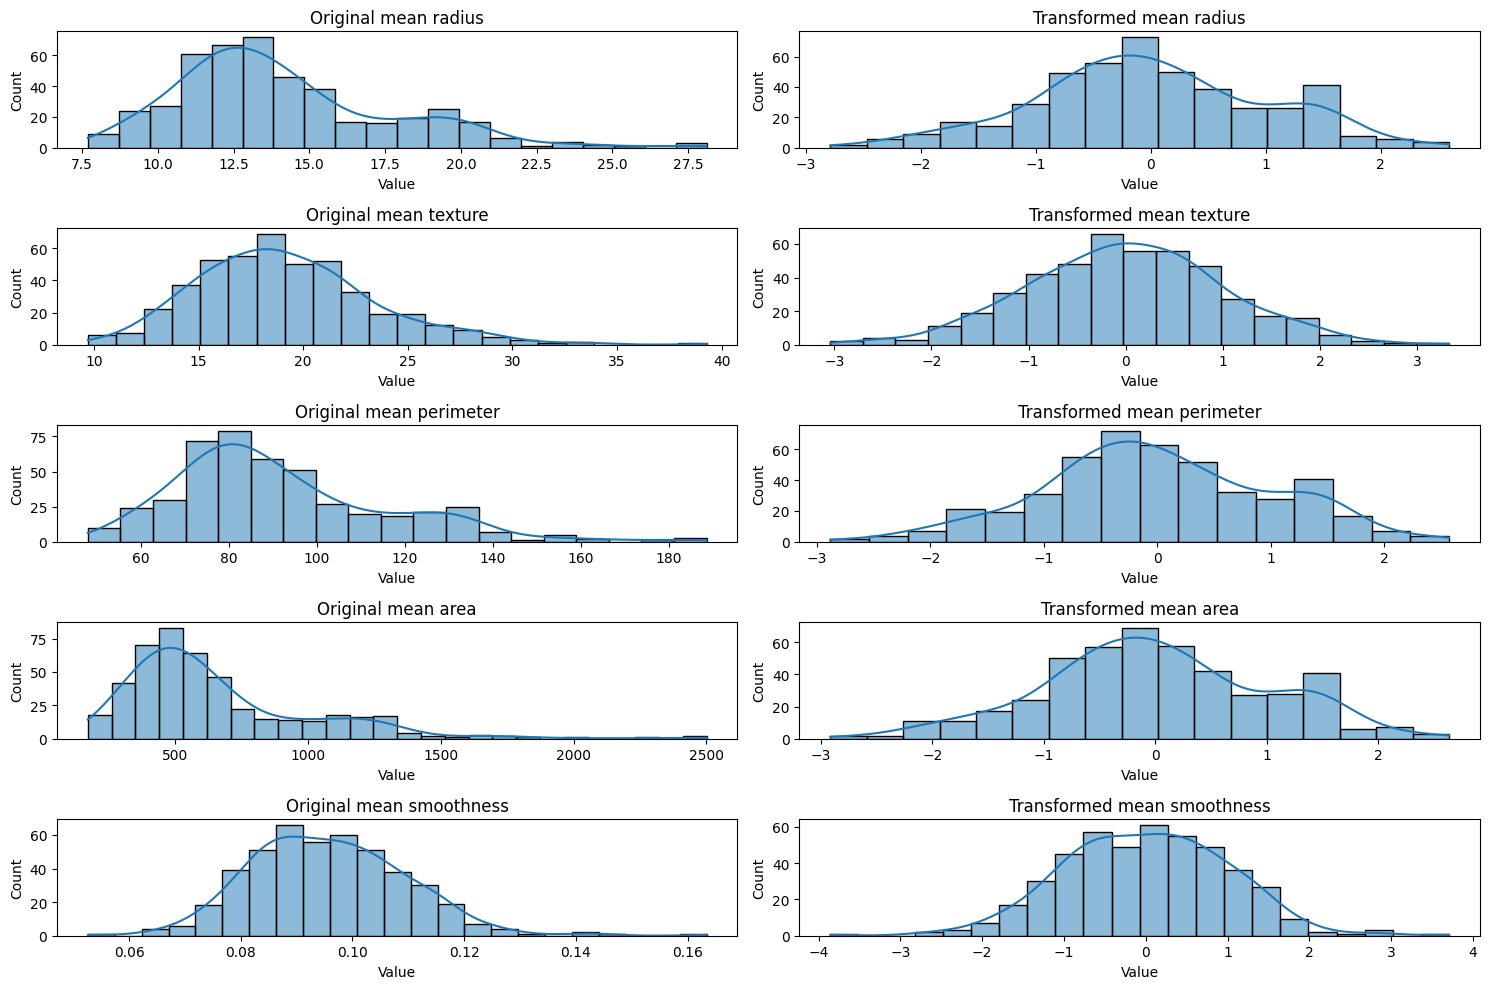

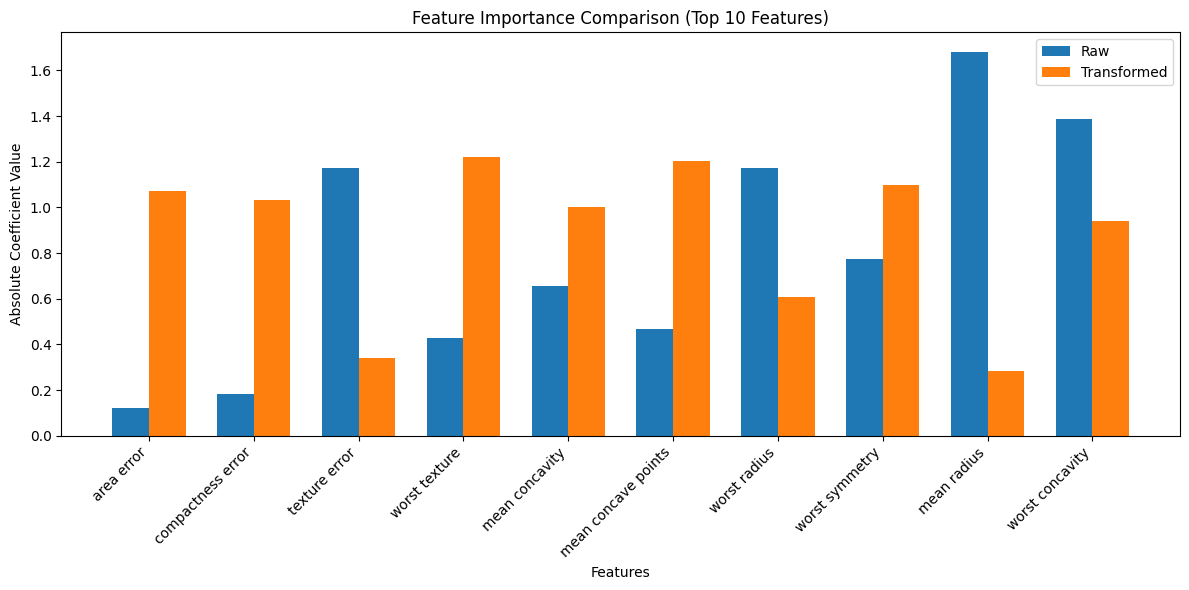

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize transformers and models
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
standard_scaler = StandardScaler()
model_raw = LogisticRegression(max_iter=1000)
model_transformed = LogisticRegression(max_iter=1000)
model_scaled = LogisticRegression(max_iter=1000)

# Fit and evaluate model on raw data
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
y_prob_raw = model_raw.predict_proba(X_test)[:, 1]

# Transform features using PowerTransformer
X_train_transformed = power_transformer.fit_transform(X_train)
X_test_transformed = power_transformer.transform(X_test)

# Fit and evaluate model on transformed data
model_transformed.fit(X_train_transformed, y_train)
y_pred_transformed = model_transformed.predict(X_test_transformed)
y_prob_transformed = model_transformed.predict_proba(X_test_transformed)[:, 1]

# Scale features using StandardScaler
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

# Fit and evaluate model on scaled data
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_prob_scaled = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Calculate cross-validation scores for all models
cv_scores_raw = cross_val_score(
    LogisticRegression(max_iter=1000), 
    X, y, 
    cv=5, 
    scoring='roc_auc'
)
cv_scores_transformed = cross_val_score(
    LogisticRegression(max_iter=1000), 
    power_transformer.fit_transform(X), 
    y, 
    cv=5, 
    scoring='roc_auc'
)
cv_scores_scaled = cross_val_score(
    LogisticRegression(max_iter=1000), 
    standard_scaler.fit_transform(X), 
    y, 
    cv=5, 
    scoring='roc_auc'
)

# Print results
print("\nClassification Report - Raw Data:")
print(classification_report(y_test, y_pred_raw))
print("\nClassification Report - Scaled Data:")
print(classification_report(y_test, y_pred_scaled))
print("\nClassification Report - Transformed Data:")
print(classification_report(y_test, y_pred_transformed))

print("\nROC AUC Scores:")
print(f"Raw Data: {roc_auc_score(y_test, y_prob_raw):.4f}")
print(f"Scaled Data: {roc_auc_score(y_test, y_prob_scaled):.4f}")
print(f"Transformed Data: {roc_auc_score(y_test, y_prob_transformed):.4f}")

print("\nCross-validation ROC AUC Scores:")
print(f"Raw Data: {cv_scores_raw.mean():.4f} (+/- {cv_scores_raw.std() * 2:.4f})")
print(f"Scaled Data: {cv_scores_scaled.mean():.4f} (+/- {cv_scores_scaled.std() * 2:.4f})")
print(f"Transformed Data: {cv_scores_transformed.mean():.4f} (+/- {cv_scores_transformed.std() * 2:.4f})")

# Visualize distributions of features before and after transformation
def plot_distributions(original_data, transformed_data, feature_names, n_features=5):
    plt.figure(figsize=(15, 10))
    for i in range(n_features):
        # Original distribution
        plt.subplot(n_features, 2, 2*i + 1)
        sns.histplot(original_data[:, i], kde=True)
        plt.title(f'Original {feature_names[i]}')
        plt.xlabel('Value')
        
        # Transformed distribution
        plt.subplot(n_features, 2, 2*i + 2)
        sns.histplot(transformed_data[:, i], kde=True)
        plt.title(f'Transformed {feature_names[i]}')
        plt.xlabel('Value')
    
    plt.tight_layout()
    plt.show()

# Plot the first 5 features
plot_distributions(
    X_train.values, 
    X_train_transformed, 
    data.feature_names, 
    n_features=5
)

# Feature importance comparison
def plot_feature_importance_comparison(model_raw, model_transformed, feature_names):
    plt.figure(figsize=(12, 6))
    
    importance_raw = np.abs(model_raw.coef_[0])
    importance_transformed = np.abs(model_transformed.coef_[0])
    
    # Get top 10 features by average importance
    avg_importance = (importance_raw + importance_transformed) / 2
    top_indices = np.argsort(avg_importance)[-10:]
    
    x = np.arange(len(top_indices))
    width = 0.35
    
    plt.bar(x - width/2, importance_raw[top_indices], width, label='Raw')
    plt.bar(x + width/2, importance_transformed[top_indices], width, label='Transformed')
    
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Feature Importance Comparison (Top 10 Features)')
    plt.xticks(x, feature_names[top_indices], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot feature importance comparison
plot_feature_importance_comparison(
    model_raw, 
    model_transformed, 
    np.array(data.feature_names)
)